# Simple Reinforcement Learning with Tensorflow: Part 0 - Q-Networks
In this iPython notebook we implement a Q-Network algorithm that solves the FrozenLake problem. To learn more, read here: https://medium.com/@awjuliani/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0

For more reinforcment learning tutorials, see:
https://github.com/awjuliani/DeepRL-Agents

In [1]:
from __future__ import division

import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
import skimage
import scipy
%matplotlib inline

### Load the environment

In [2]:
# env= gym.make("Breakout-v0")
# env = gym.make("FrozenLake-v0")
env = gym.make("Pong-v0")

In [4]:
obs_size =25200
def filter_obs(observation):
#     import pdb;pdb.set_trace()
    obs_new = skimage.transform.resize(observation,(80,80))
    obs_new=obs_new.flatten()
    obs_new.resize((1,obs_size))
    return obs_new

## The Q-Network Approach

### Implementing the network itself

In [7]:
tf.reset_default_graph()

In [8]:
#These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,obs_size],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([obs_size,env.action_space.n],0,0.01))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,env.action_space.n],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

### Training the network

In [10]:
init = tf.global_variables_initializer()

# Set learning parameters
y = .99
e = 0.1
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        print( "episode: ",i)
        #Reset environment and get first new observation
        s = env.reset()
        s = filter_obs(s)
        rAll = 0
        d = False
        j = 0
        #The Q-Network
        while j < 2000:
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            a,allQ = sess.run([predict,Qout],feed_dict={inputs1:s})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            #Get new state and reward from environment
            s1,r,d,_ = env.step(a[0])
            s1=filter_obs(s1)
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:s1})
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:s,nextQ:targetQ})
            rAll += r
            s = s1
            if d == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")

episode:  0
episode:  1
episode:  2
episode:  3
episode:  4
episode:  5
episode:  6
episode:  7
episode:  8
episode:  9
episode:  10
episode:  11
episode:  12
episode:  13
episode:  14
episode:  15
episode:  16
episode:  17
episode:  18
episode:  19
episode:  20
episode:  21
episode:  22
episode:  23
episode:  24
episode:  25
episode:  26
episode:  27
episode:  28
episode:  29
episode:  30
episode:  31
episode:  32
episode:  33
episode:  34
episode:  35
episode:  36
episode:  37
episode:  38
episode:  39
episode:  40
episode:  41
episode:  42
episode:  43
episode:  44
episode:  45
episode:  46
episode:  47
episode:  48
episode:  49
episode:  50
episode:  51
episode:  52
episode:  53
episode:  54
episode:  55
episode:  56
episode:  57
episode:  58
episode:  59
episode:  60
episode:  61
episode:  62
episode:  63
episode:  64
episode:  65
episode:  66
episode:  67
episode:  68
episode:  69
episode:  70
episode:  71
episode:  72
episode:  73
episode:  74
episode:  75
episode:  76
episode: 

KeyboardInterrupt: 

### Some statistics on network performance

We can see that the network beings to consistly reach the goal around the 750 episode mark.

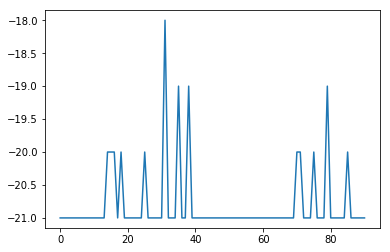

In [11]:
plt.plot(rList)

It also begins to progress through the environment for longer than chance aroudn the 750 mark as well.

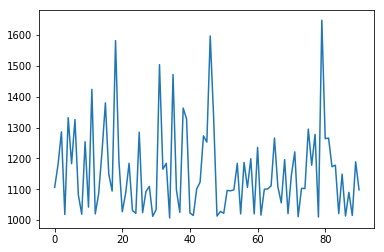

In [12]:
plt.plot(jList)